In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List, Tuple

import hydra
import lightning as pl
from omegaconf import DictConfig
from lightning import Callback, LightningDataModule, LightningModule, Trainer
from lightning.pytorch.loggers import Logger

from terralearn import utils

import torch
import hydra
import omegaconf
import pyrootutils
import pandas as pd
from tqdm import tqdm
import numpy as np
from fgvc.models.augmentations import Mixup_transmix
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_csv('/home/ubuntu/FGVC11_2024/data/PlantTrait/test.csv')
# df['path'] = '/home/ubuntu/FGVC11_2024/data/PlantTrait/test_images/' + df['id'].astype(str) + '.jpeg'
# # df.to_csv('/home/ubuntu/FGVC11_2024/data/PlantTrait/df_test.csv', index=False)

In [4]:
cfg = omegaconf.OmegaConf.load("/home/ubuntu/FGVC11/configs/data/plant_traits_data.yaml")
datamodule: LightningDataModule = hydra.utils.instantiate(cfg)
datamodule.setup()

In [5]:
mixup_augmentor = Mixup_transmix(
        mixup_alpha=0.8,
        cutmix_alpha=1.0,
        cutmix_minmax=None,
        prob=0.5,
        switch_prob=0.5,
        mode="batch",
        correct_lam=True,
        label_smoothing=0.1,
        num_classes=17396,
)

In [12]:
for batch in datamodule.train_dataloader():
    break
x, x_tab, y_reg, y_clf = (
            batch["image"],
            batch["metadata"],
            batch["label"],
            batch["specie"],
        )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


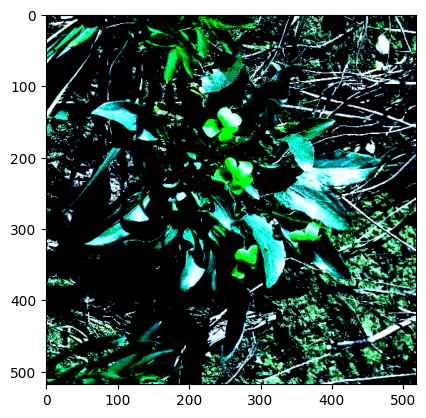

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


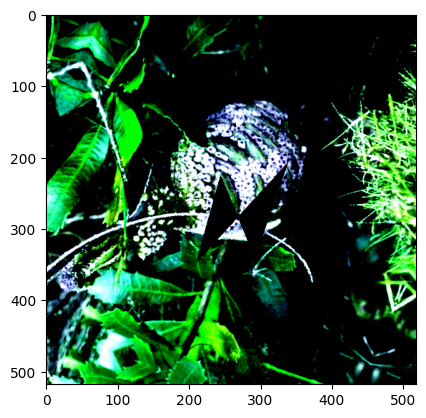

In [13]:
plt.imshow(x[0].permute(1,2,0))
plt.show()
plt.imshow(x[-1].permute(1,2,0))
plt.show()

In [14]:
x_tab, y_reg, y_clf, lam

(tensor([[-1.3964, -0.9066, -0.5288,  ..., -0.3191, -0.3558, -0.3169],
         [ 0.0989, -0.4507,  0.0840,  ..., -1.1808, -1.1776, -1.2587],
         [ 1.1310,  0.4755,  1.0724,  ..., -1.1321, -1.1613, -1.1836],
         ...,
         [-0.0928,  0.0664,  0.4271,  ...,  1.0291,  1.2946,  1.2260],
         [ 0.2001, -0.7423, -0.6524,  ...,  0.0618,  0.3254,  0.1479],
         [ 0.8989,  0.5338,  0.0524,  ..., -0.3066, -0.2113, -0.1513]]),
 tensor([[4.9707e-01, 2.3387e+01, 1.7214e-01, 1.0182e+00, 2.8542e+00, 5.8371e+02],
         [5.1031e-01, 1.1495e+01, 5.6993e-01, 1.5751e+00, 1.5827e+00, 1.4176e+02],
         [3.9902e-01, 1.8960e+01, 5.9593e-01, 1.5943e+00, 3.7948e-01, 6.0487e+02],
         [3.9537e-01, 1.7063e+01, 3.4560e-01, 1.6989e+00, 2.2932e+00, 6.1213e+02],
         [4.8319e-01, 1.5256e+01, 1.5060e+00, 1.5785e+00, 2.5999e+01, 5.6253e+03],
         [3.1295e-01, 1.1533e+01, 4.5465e-01, 1.4541e+00, 9.6269e-01, 4.4662e+02],
         [3.3906e-01, 1.3723e+01, 6.4470e+00, 1.8518e+00, 4.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


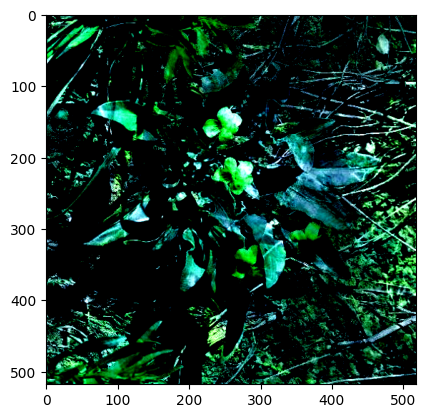

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


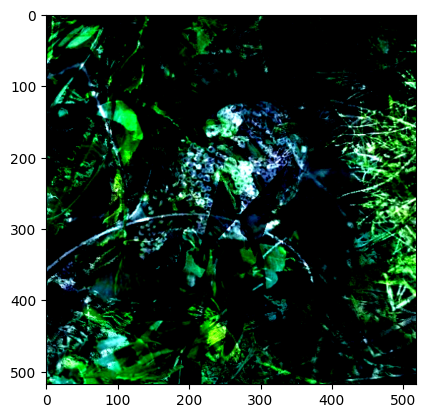

0.6488848263589627

In [16]:
x, x_tab, y_reg, y_clf, lam = mixup_augmentor(x, x_tab, y_reg, y_clf)
plt.imshow(x[0].permute(1,2,0))
plt.show()
plt.imshow(x[-1].permute(1,2,0))
plt.show()
lam

In [17]:
x_tab, y_reg, y_clf, lam

(tensor([[-0.5905, -0.4009, -0.3248,  ..., -0.3147, -0.3050, -0.2587],
         [ 0.1344, -0.5531, -0.1746,  ..., -0.7445, -0.6499, -0.7648],
         [ 0.7013,  0.3319,  0.8458,  ..., -0.3732, -0.2990, -0.3376],
         ...,
         [ 0.3369,  0.2101,  0.6537,  ...,  0.2703,  0.4323,  0.3799],
         [ 0.1646, -0.6400, -0.3939,  ..., -0.3745, -0.2023, -0.3460],
         [ 0.0929,  0.0281, -0.1517,  ..., -0.3110, -0.2620, -0.2094]]),
 tensor([[5.2555e-01, 1.6756e+01, 4.5685e-01, 1.2366e+00, 8.5841e+00, 8.3501e+02],
         [4.3179e-01, 1.3478e+01, 5.4861e-01, 1.4175e+00, 2.5397e+00, 3.0219e+02],
         [3.9060e-01, 1.6800e+01, 4.8051e-01, 1.3360e+00, 4.6843e-01, 6.2236e+02],
         [5.2595e-01, 1.9254e+01, 8.6831e-01, 1.4963e+00, 1.5156e+00, 1.5552e+03],
         [5.3167e-01, 1.1204e+01, 1.8646e+00, 1.7604e+00, 2.4137e+01, 4.0851e+03],
         [4.0129e-01, 1.2318e+01, 3.5331e-01, 1.3987e+00, 1.3343e+00, 3.9265e+02],
         [4.1816e-01, 1.3466e+01, 4.2985e+00, 1.4854e+00, 3.

In [ ]:
cfg = omegaconf.OmegaConf.load("/home/ubuntu/FGVC11_2024/configs/model/plant_traits_model.yaml")
model = hydra.utils.instantiate(cfg)

In [ ]:
model.load_from_checkpoint('/home/ubuntu/FGVC11_2024/logs/train/runs/2024-04-04_08-39-28/checkpoints/epoch_058.ckpt')

In [ ]:
device = 'cuda'
model.to(device)

In [ ]:
all_predictions = []
for batch in tqdm(datamodule.test_dataloader()):
    # Unpack the batch
    images = batch["image"]

    # Move data to the device
    images = images.to(device)

    # Make predictions
    with torch.no_grad():
        predictions = model.forward(images)
    # break

    # Move predictions back to CPU if necessary
    predictions = predictions.cpu().numpy()

    # Append predictions to the list
    all_predictions.append(predictions)

# Concatenate predictions from all batches
all_predictions = np.concatenate(all_predictions, axis=0)

# Create a DataFrame with the predictions and corresponding IDs
submission_df = pd.DataFrame({
    'id': df['id'].values,
    'X4': all_predictions[:, 0],
    'X11': all_predictions[:, 1],
    'X18': all_predictions[:, 2],
    'X50': all_predictions[:, 4],
    'X26': all_predictions[:, 3],
    'X3112': all_predictions[:, 5],
})

In [ ]:
images.shape

In [ ]:
submission_df.describe()

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.shape

In [ ]:
import torchsummary

In [ ]:
import timm
import torch.nn as nn
class PlantCNN(nn.Module):
    def __init__(self, num_targets=6):
        super(PlantCNN, self).__init__()
        self.train_tokens = False
        self.trainable_backbone_layers = 4
        self.body = torch.hub.load(
            "facebookresearch/dinov2", "dinov2_vits14_reg", pretrained=True
        )
        for i, layer in enumerate([self.body.patch_embed, self.body.norm]):
            for p in layer.parameters():
                p.requires_grad = False

        if not self.train_tokens:
            self.body.cls_token.requires_grad = False
            self.body.pos_embed.requires_grad = False
            self.body.register_tokens.requires_grad = False
            self.body.mask_token.requires_grad = False

        if self.trainable_backbone_layers is not None:
            for i in range(0, len(self.body.blocks) - self.trainable_backbone_layers):
                for p in self.body.blocks[i].parameters():
                    p.requires_grad = False
        self.relu1 = nn.ReLU()
        self.fc1 = nn.Linear(
            self.body.num_features, self.body.num_features // 2
        )
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(self.body.num_features // 2, num_targets)

    def forward(self, x):
        x = self.body(x)
        x = self.relu1(x)
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc2(x)
        return x

model = PlantCNN().to('cuda')

In [ ]:
torchsummary.summary(model, (3, 490, 490))